# Exercise 5: Classification Tree

## Problem 1 : Predicting CentralAir using SalePrice

In [15]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import the complete dataset "train.csv" into Jupyter
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### a) Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.

The ratio of the classes Y : N is 1365 : 95


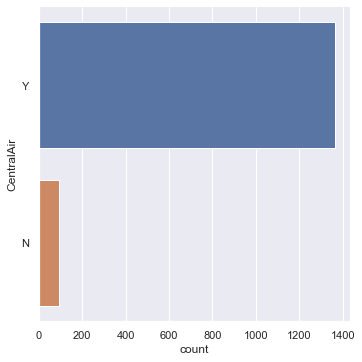

In [16]:
centralAir = pd.DataFrame(houseData['CentralAir'])

sb.catplot(y = "CentralAir", data = centralAir, kind = "count")
houseData["CentralAir"].value_counts()

# get exact values
Y = houseData[houseData.CentralAir == 'Y'].shape[0]
N = houseData[houseData.CentralAir == 'N'].shape[0]
print("The ratio of the classes Y : N is", Y, ":", N)

## Alternative method
# countY, countX = houseData.CentralAir.value_counts()
# print("Ratio of classes is Y : N = ", countY, ":", countX)

### b) Plot CentralAir against SalePrice using any appropriate bivariate plot to note the mutual relationship.

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

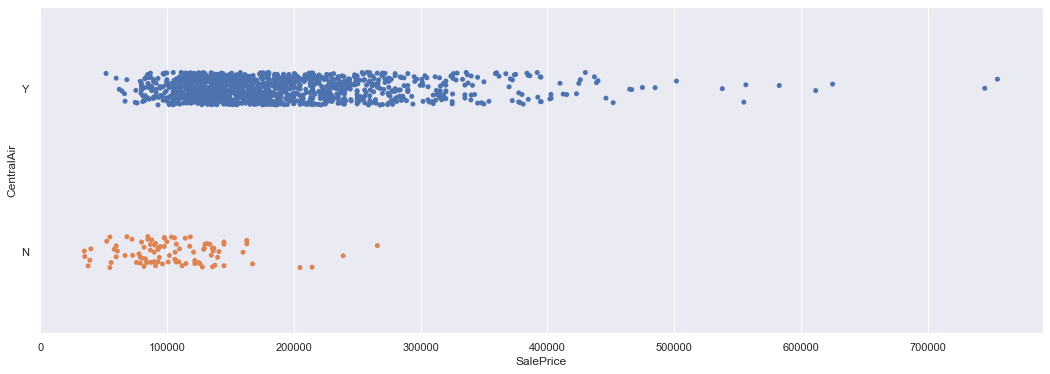

In [17]:
salePrice = pd.DataFrame(houseData['SalePrice'])

# Create a joint dataframe by concatenating Total and Legendary
compareDF = pd.concat([salePrice, centralAir], axis = 1).reindex(salePrice.index)

# Joint Stripplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.stripplot(x = "SalePrice", y = "CentralAir", data = compareDF, orient = "h")

# ======================================================================================================
# CAN USE BUT NOT A VERY ACCURATE GAUGE 
# Joint Boxplot of Total Train against Legendary Train
# f = plt.figure(figsize=(18, 6))
# sb.boxplot(x = "SalePrice", y = "CentralAir", data = compareDF, orient = "h")
# ======================================================================================================

Good to note that the two boxplots for `SalePrice`, for `CentralAir = Y` and `CentralAir = N`, are different from one another in terms of their median value, as well as spread. This means that `CentralAir` has an effect on `SalePrice`, and hence, `SalePrice` will probably be an important variable in predicting `CentralAir`. Boxplots do not tell us where to make the cuts though -- it will be easier to visualize in the following `swarmplot`.

### c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [19]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData['SalePrice'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


### e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using SalePrice.

In [20]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

### f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

In [21]:
from sklearn.tree import plot_tree

### g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

[Text(334.8, 543.6, 'SalePrice <= 98300.0\ngini = 0.121\nsamples = 1100\nvalue = [71, 1029]\nclass = Y'),
 Text(167.4, 326.16, 'SalePrice <= 61691.5\ngini = 0.494\nsamples = 83\nvalue = [37, 46]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.467\nsamples = 70\nvalue = [26, 44]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 137950.0\ngini = 0.065\nsamples = 1017\nvalue = [34, 983]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.176\nsamples = 257\nvalue = [25, 232]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.023\nsamples = 760\nvalue = [9, 751]\nclass = Y')]

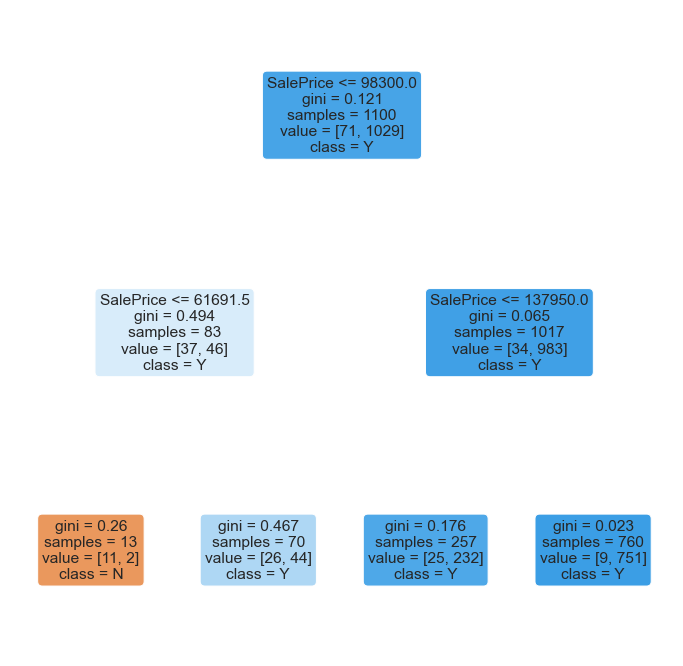

In [22]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

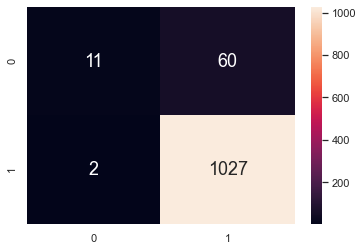

In [23]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

### h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

In [24]:
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.9436363636363636

TPR Train :	 0.9980563654033042
TNR Train :	 0.15492957746478872

FPR Train :	 0.8450704225352113
FNR Train :	 0.001943634596695821


### i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

[Text(334.8, 543.6, 'SalePrice <= 98300.0\ngini = 0.121\nsamples = 1100\nvalue = [71, 1029]\nclass = Y'),
 Text(167.4, 326.16, 'SalePrice <= 61691.5\ngini = 0.494\nsamples = 83\nvalue = [37, 46]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.467\nsamples = 70\nvalue = [26, 44]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 137950.0\ngini = 0.065\nsamples = 1017\nvalue = [34, 983]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.176\nsamples = 257\nvalue = [25, 232]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.023\nsamples = 760\nvalue = [9, 751]\nclass = Y')]

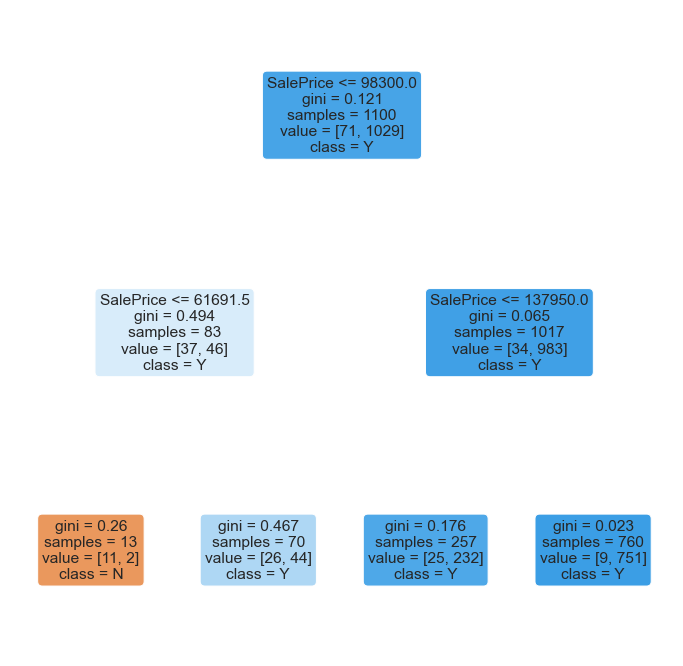

In [25]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_test.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

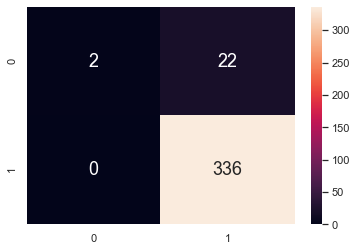

In [26]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

In [27]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.9388888888888889

TPR Test :	 1.0
TNR Test :	 0.08333333333333333

FPR Test :	 0.9166666666666666
FNR Test :	 0.0


**Important** : Note the huge imbalance in the *False Positives* and *False Negatives* in the confusion matrix. *False Positives* are much higher in number than *False Negatives* in both Train and Test data. This is not surprising -- actually, this is a direct effect of the huge `Y` vs `N` class imbalance in the response variable `CentralAir`. As `CentralAir = Y` was more likely in the data, *False Positives* are more likely too. Think about how you can fix it!

## Problem 2 : Predicting CentralAir using Other Variables

Perform all the above steps on “CentralAir” against each of the variables “GrLivArea”, “OverallQual”, “YearBuilt”, oneby-
one to perform individual Binary Classifications and obtain individual univariate Decision Tree Models in each case.
Consider all predictor variables “GrLivArea”, “OverallQual”, “YearBuilt” as Numeric in case of this classification problem.

### Predicting CentralAir using GrLivArea

<AxesSubplot:xlabel='GrLivArea', ylabel='CentralAir'>

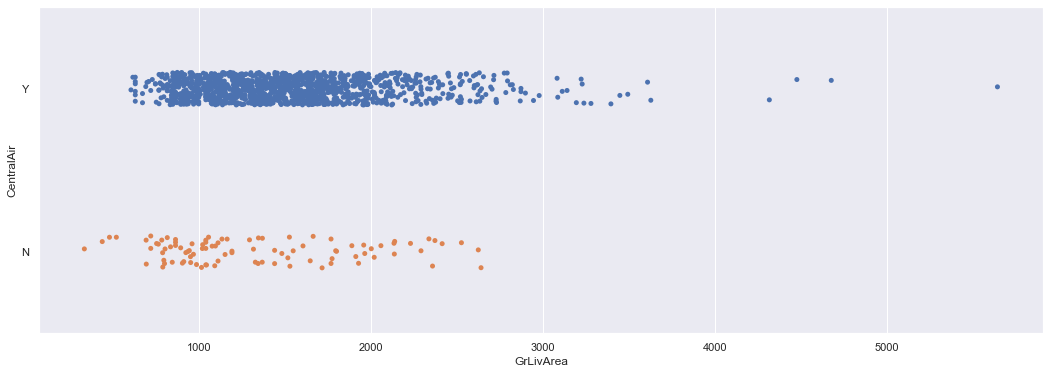

In [31]:
# Plot Response against Predictor to visualize their mutual relationship.
f = plt.figure(figsize=(18, 6))
sb.stripplot(x = "GrLivArea", y = "CentralAir", data = houseData)

In [32]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData['GrLivArea'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2)

--------------------- Decision Tree (Train Dataset) ---------------------


[Text(267.84000000000003, 543.6, 'GrLivArea <= 562.5\ngini = 0.119\nsamples = 1100\nvalue = [70, 1030]\nclass = Y'),
 Text(133.92000000000002, 326.16, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(401.76000000000005, 326.16, 'GrLivArea <= 1045.5\ngini = 0.115\nsamples = 1097\nvalue = [67, 1030]\nclass = Y'),
 Text(267.84000000000003, 108.72000000000003, 'gini = 0.247\nsamples = 215\nvalue = [31, 184]\nclass = Y'),
 Text(535.6800000000001, 108.72000000000003, 'gini = 0.078\nsamples = 882\nvalue = [36, 846]\nclass = Y')]

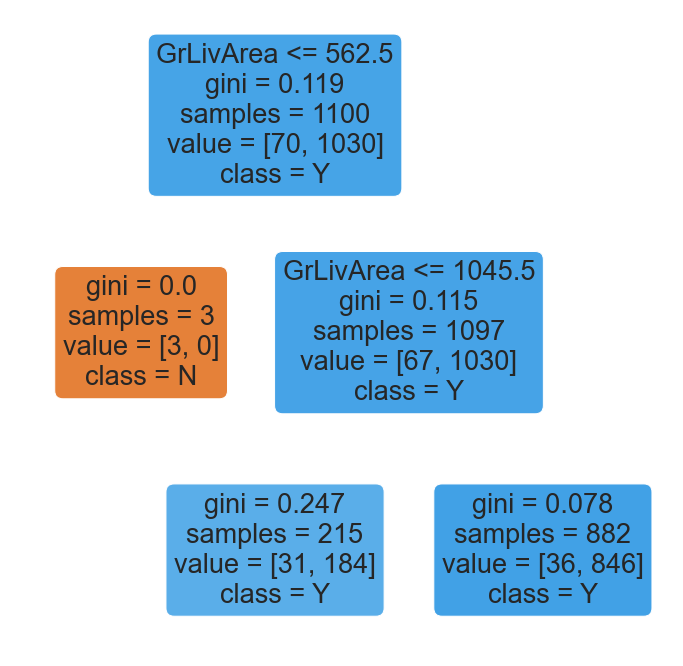

In [33]:
print("--------------------- Decision Tree (Train Dataset) ---------------------")
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

--------------------- Decision Tree (Test Dataset) ---------------------


[Text(133.92000000000002, 181.2, 'GrLivArea <= 562.5\ngini = 0.119\nsamples = 1100\nvalue = [70, 1030]\nclass = Y'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(200.88000000000002, 108.72, 'GrLivArea <= 1045.5\ngini = 0.115\nsamples = 1097\nvalue = [67, 1030]\nclass = Y'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.247\nsamples = 215\nvalue = [31, 184]\nclass = Y'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.078\nsamples = 882\nvalue = [36, 846]\nclass = Y')]

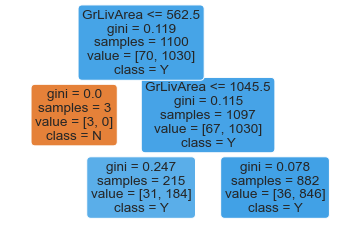

In [34]:
print("--------------------- Decision Tree (Test Dataset) ---------------------")
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_test.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9390909090909091

TPR Train :	 1.0
TNR Train :	 0.04285714285714286

FPR Train :	 0.9571428571428572
FNR Train :	 0.0


<AxesSubplot:>

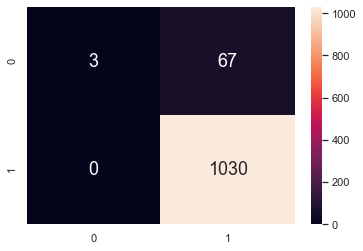

In [35]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9333333333333333

TPR Test :	 1.0
TNR Test :	 0.04

FPR Test :	 0.96
FNR Test :	 0.0


<AxesSubplot:>

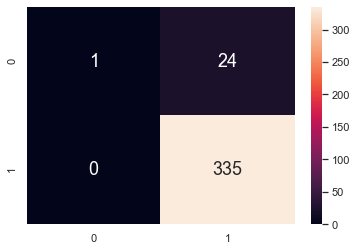

In [36]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Problem 3 : Best Uni-Variate Model to Predict CentralAir

Compare and contrast the four models in terms of Classification Accuracy, True Positive Rate and False Positive Rate on both Train and Test Data to comment on which univariate classification tree you think is the best to predict “CentralAir”.

In [ ]:
predictors = ["SalePrice", "GrLivArea", "OverallQual", "YearBuilt"]
for predict in predictors:
    print()
    print("----------------------------------------------------", predict, "----------------------------------------------------")
    print()
    centralAir = pd.DataFrame(houseData['CentralAir'])
    predictor = pd.DataFrame(houseData[predict])
    
    print("--- Train Dataset ---")
    # Create a Decision Tree Classifier object
    dectree_train = DecisionTreeClassifier(max_depth = 2)

    predict_train = pd.DataFrame(houseData_train[predict])
    centralAir_train = pd.DataFrame(houseData_train['CentralAir'])

    # Train the Decision Tree Classifier model
    dectree_train.fit(predict_train, centralAir_train)

    # Predict Legendary corresponding to Total Train
    centralAir_train_pred = dectree_train.predict(predict_train)
    
    CM_train = confusion_matrix(centralAir_train, centralAir_train_pred)
    # Print the Classification Accuracy
    print("Classification Accuracy \t:", dectree_train.score(predict_train, centralAir_train))

    TP_train = CM_train[1][1]
    FP_train = CM_train[0][1]

    print("True Positive Rate \t\t:", TP_train/(TP_train + FN_train))
    print("False Positive Rate \t\t:", FP_train/(FP_train + TN_train))
    print()
    
    print("--- Test Dataset ---")
    # Create a Decision Tree Classifier object
    dectree_test = DecisionTreeClassifier(max_depth = 2)

    predict_test = pd.DataFrame(houseData_test[predict])
    centralAir_test = pd.DataFrame(houseData_test['CentralAir'])

    # Train the Decision Tree Classifier model
    dectree_test.fit(predict_test, centralAir_test)
    
    # Predict Legendary corresponding to Total Train
    centralAir_test_pred = dectree_test.predict(predict_test)
    
    CM_test = confusion_matrix(centralAir_test, centralAir_test_pred)
    # Print the Classification Accuracy
    print("Classification Accuracy \t:", dectree_test.score(predict_test, centralAir_test))

    TP_test = CM_test[1][1]
    FP_test = CM_test[0][1]

    print("True Positive Rate \t\t:", TP_test/(TP_test + FN_test))
    print("False Positive Rate \t\t:", FP_test/(FP_test + TN_test))
    print()

**-------------------------------------------------------------------------------------- Conclusion --------------------------------------------------------------------------------------**

*Key Idea: Together with a high classification accuracy, the higher the true positive rate, the better and more accurate the data. The lower the false positive rate, the lesser error it has.*

 *  `CentralAir` vs `SalePrice` has the best Classification Accuracy out of the 4 models
 *  `CentralAir` vs `YearBuilt` has the worst Classification Accuracy out of the 4 models

Based on **train** data, and re-running the whole notebook a number of times to cross-check, `Saleprice` has the **highest classification accuracy** compared to the other 3 models. It also tends to have the **lowest false positive rate** and **highest true positive rate** among the 4 models after each run.

Based on **test** data, and re-running the whole notebook a number of times to cross-check, `Saleprice` has the **highest classification accuracy** compared to the other 3 models. Similar to the train data, it also tends to have the **lowest false positive rate** and **highest true positive rate** among the 4 models after each run.

Based on these accuracy measures, the best classification tree to predict `Central Air` is by using the **`SalePrice` and `Central Air` Classification tree**.

However, we cannot be so confident that the **`SalePrice` and `Central Air` Classification tree** is the best yet.

Despite having the lowest false positive rate **out of the 4 models**, on its own, the false positive rate is still high (on avg 0.9 for train dataset!). 

Therefore I have decided to further test the models in terms of **precision, recall and F1 score** as shown below.

In [ ]:
predictors = ["SalePrice", "GrLivArea", "OverallQual", "YearBuilt"]
for predict in predictors:
    print()
    print("----------------------------------------------------", predict, "----------------------------------------------------")
    print()
    centralAir = pd.DataFrame(houseData['CentralAir'])
    predictor = pd.DataFrame(houseData[predict])
    
    print("--- Train Dataset ---")
    # Create a Decision Tree Classifier object
    dectree_train = DecisionTreeClassifier(max_depth = 2)

    predict_train = pd.DataFrame(houseData_train[predict])
    centralAir_train = pd.DataFrame(houseData_train['CentralAir'])

    # Train the Decision Tree Classifier model
    dectree_train.fit(predict_train, centralAir_train)

    # Predict Legendary corresponding to Total Train
    centralAir_train_pred = dectree_train.predict(predict_train)
    
    CM_train = confusion_matrix(centralAir_train, centralAir_train_pred)

    TP_train = CM_train[1][1]
    FP_train = CM_train[0][1]
    FN_train = CM_train[1][0]
    
    recall_train = TP_train/(TP_train + FN_train)
    precision_train = TP_train/(TP_train + FP_train)

    print("Recall \t\t\t:", recall_train)
    print("Precision \t\t:", precision_train)
    print("F1 Score \t\t:", 2 * ((precision_train * recall_train)/(precision_train + recall_train)))
    print()
    
    print("--- Test Dataset ---")
    # Create a Decision Tree Classifier object
    dectree_test = DecisionTreeClassifier(max_depth = 2)

    predict_test = pd.DataFrame(houseData_test[predict])
    centralAir_test = pd.DataFrame(houseData_test['CentralAir'])

    # Train the Decision Tree Classifier model
    dectree_test.fit(predict_test, centralAir_test)
    
    # Predict Legendary corresponding to Total Train
    centralAir_test_pred = dectree_test.predict(predict_test)
    
    CM_test = confusion_matrix(centralAir_test, centralAir_test_pred)

    TP_test = CM_test[1][1]
    FP_test = CM_test[0][1]
    FN_test = CM_test[1][0]

    recall_test = TP_test/(TP_test + FN_test)
    precision_test = TP_test/(TP_test + FP_test)

    print("Recall \t\t\t:", recall_test)
    print("Precision \t\t:", precision_test)
    print("F1 Score \t\t:", 2 * ((precision_test * recall_test)/(precision_test + recall_test)))
    print()

* `Precision` is a good measure to determine, when the costs of False Positive is high.
* `Recall` is a good measure when there is a high cost associated with False Negative.
* `F1 Score` might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

For this problem, we are focusing on **True Positive Rate and False Positive Rate** on both Train and Test Data. So **precision** will be used to further compare the different models. 

After a few runs, I realised that `SalePrice` and `OverallQual` tend to have similar high values for precision, hence are the best predictors for `CentralAir`. 
So to choose the better out of the 2, I looked at the F1 score (more balance), and `SalePrice` had the higher F1 scores for all my runs. 

Therefore, I can more confidently say that the **`SalePrice` and `Central Air` Classification tree** is the best predictor for `CentralAir`.

# -----------------------------------------------------------------------------
#### Prof's Answer

Compare and contrast the four models in terms of Classification Accuracy, TPR and FPR on both Train and Test Data.

* `CentralAir` vs `SalePrice` has the highest Training Accuracy out of the four models.
* `CentralAir` vs `GrLivArea` has the highest Test Accuracy out of the four models.
* However, the train and test accuracy for all four models are pretty high and quite close.
* So, it is not easy to justify which model is better just using their classification accuracy.


However, if we look at the True Positive Rate (TPR) and False Positive Rate (FPR) of the four models, we find that

* `YearBuilt` yields a TPR of 1 (best-case) but an FPR of 1 (worst-case) on both Train and Test data. Really bad for prediction.
* `GrLivArea` yields a TPR of close to 1 (best-case) but an FPR of close to 1 (worst-case) on Train and Test set, not good either.
* `SalePrice` and `OverallQual` yield the best TPR (high) vs FPR (not-as-high) trade-off in case of both Train and Test data.

Overall, the predictor `OverallQual` is the best amongst the four in predicting `CentralAir`, while `SalePrice` is a close second as per the models above. `YearBuilt` is definitely the worst predictor out of these four variables, with `GrLivArea` not doing so well either, given the models above.

**Did you notice?** : Go back and check again all accuracy figures for the four models. I am pretty sure you did not get the exact same values as I did. This is due to the random selection of Train-Test sets. In fact, if you run the above cells again, you will get a different set of accuracy figures. If that is so, can we really be confident that `OverallQual` will always be the best variable to predict `CentralAir`? Think about it. ;-)

---

## Extra : Predicting CentralAir using All Variables

Use all the other variables from the dataset to predict `CentralAir`, as mentioned in the problem.    

In [37]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData[['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2)

[Text(669.6, 1087.2, 'YearBuilt <= 1917.5\ngini = 0.13\nsamples = 1100\nvalue = [77, 1023]\nclass = Y'),
 Text(334.8, 652.32, 'SalePrice <= 97000.0\ngini = 0.499\nsamples = 60\nvalue = [31, 29]\nclass = N'),
 Text(167.4, 217.44000000000005, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]\nclass = N'),
 Text(502.20000000000005, 217.44000000000005, 'gini = 0.495\nsamples = 49\nvalue = [22, 27]\nclass = Y'),
 Text(1004.4000000000001, 652.32, 'SalePrice <= 98150.0\ngini = 0.085\nsamples = 1040\nvalue = [46, 994]\nclass = Y'),
 Text(837.0, 217.44000000000005, 'gini = 0.481\nsamples = 62\nvalue = [25, 37]\nclass = Y'),
 Text(1171.8, 217.44000000000005, 'gini = 0.042\nsamples = 978\nvalue = [21, 957]\nclass = Y')]

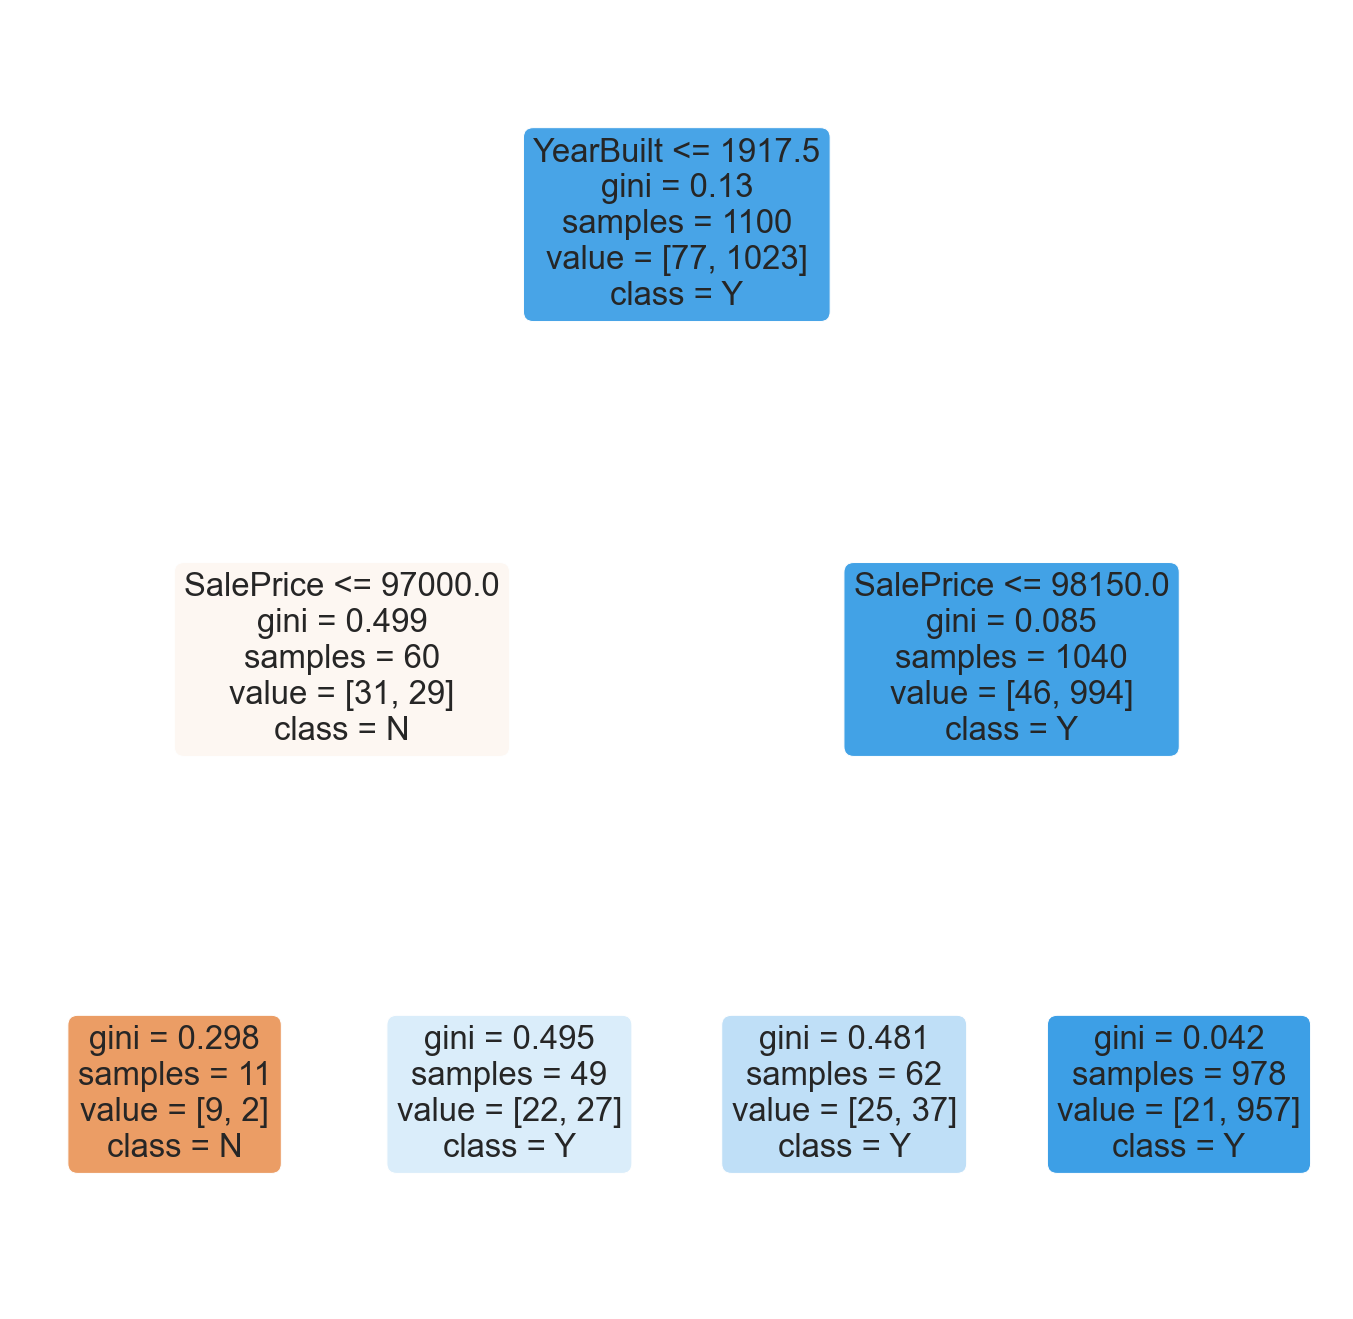

In [38]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9363636363636364

TPR Train :	 0.9980449657869013
TNR Train :	 0.11688311688311688

FPR Train :	 0.8831168831168831
FNR Train :	 0.0019550342130987292


<AxesSubplot:>

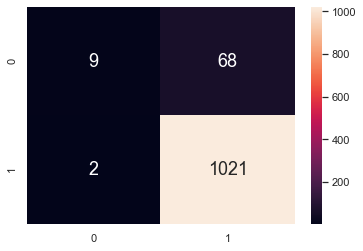

In [39]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9472222222222222

TPR Test :	 0.9941520467836257
TNR Test :	 0.05555555555555555

FPR Test :	 0.9444444444444444
FNR Test :	 0.005847953216374269


<AxesSubplot:>

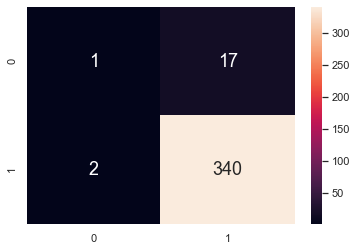

In [40]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Observation :** The model with `CentralAir` against all the four variables `SalePrice`, `GrLivArea`, `OverallQual`, `YearBuilt` is not necessarily better.

Experiment with `max_depth` of the Decision Tree to check the variations in accuracy and confusion matrix for train and test. Think about it!

[Text(619.3800000000001, 1174.1760000000002, 'SalePrice <= 107700.0\ngini = 0.11\nsamples = 1100\nvalue = [64, 1036]\nclass = Y'),
 Text(267.84000000000003, 913.248, 'YearBuilt <= 1958.0\ngini = 0.452\nsamples = 107\nvalue = [37, 70]\nclass = Y'),
 Text(133.92000000000002, 652.3200000000002, 'SalePrice <= 63250.0\ngini = 0.499\nsamples = 75\nvalue = [36, 39]\nclass = Y'),
 Text(66.96000000000001, 391.39200000000005, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = N'),
 Text(200.88000000000002, 391.39200000000005, 'SalePrice <= 105875.0\ngini = 0.489\nsamples = 68\nvalue = [29, 39]\nclass = Y'),
 Text(133.92000000000002, 130.46400000000017, 'gini = 0.475\nsamples = 62\nvalue = [24, 38]\nclass = Y'),
 Text(267.84000000000003, 130.46400000000017, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = N'),
 Text(401.76000000000005, 652.3200000000002, 'GrLivArea <= 1483.0\ngini = 0.061\nsamples = 32\nvalue = [1, 31]\nclass = Y'),
 Text(334.80000000000007, 391.39200000000005, 'gini = 0.0\nsam

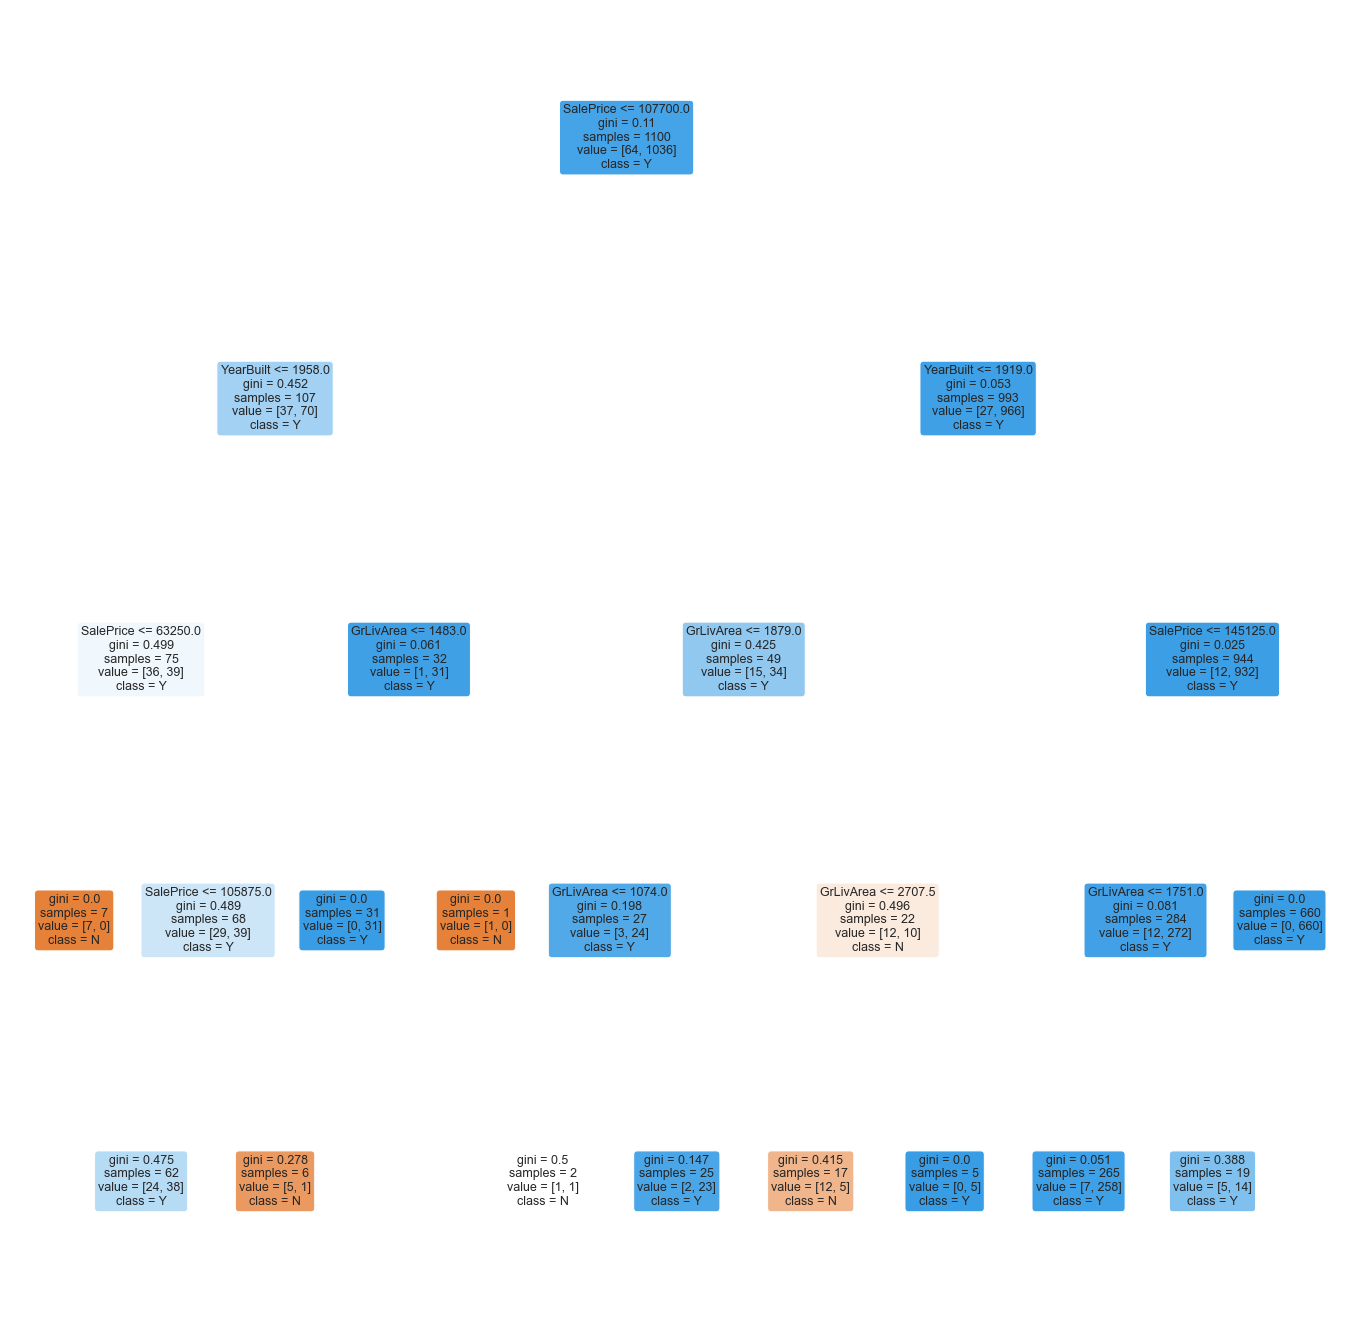

In [41]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(houseData['CentralAir'])
X = pd.DataFrame(houseData[['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # CHANGE IT HERE AND EXPERIMENT
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9590909090909091

TPR Train :	 0.9932432432432432
TNR Train :	 0.40625

FPR Train :	 0.59375
FNR Train :	 0.006756756756756757


<AxesSubplot:>

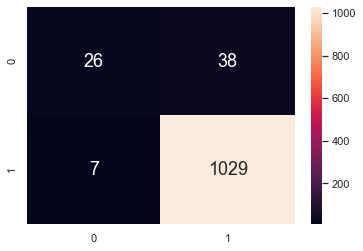

In [42]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9222222222222223

TPR Test :	 0.9817629179331308
TNR Test :	 0.2903225806451613

FPR Test :	 0.7096774193548387
FNR Test :	 0.0182370820668693


<AxesSubplot:>

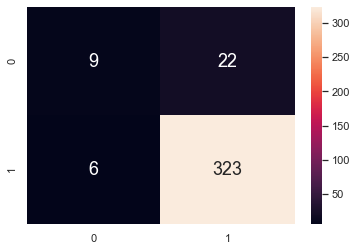

In [43]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})